___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 2<br><br>Installing Tensorflow & Keras Syntax Basics<br><br>Fake Reg<br><h1>

# Installing Tensorflow

In [1]:
!python --version

Python 3.9.6


In [2]:
!pip install tensorflow

  Using cached tensorflow-2.8.0-cp39-cp39-win_amd64.whl (438.0 MB)
  Using cached libclang-13.0.0-py2.py3-none-win_amd64.whl (13.9 MB)
  Using cached h5py-3.6.0-cp39-cp39-win_amd64.whl (2.8 MB)
  Using cached wrapt-1.13.3-cp39-cp39-win_amd64.whl (34 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tf_estimator_nightly-2.8.0.dev2021122109-py2.py3-none-any.whl (462 kB)
  Using cached tensorflow_io_gcs_filesystem-0.24.0-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached protobuf-3.19.4-cp39-cp39-win_amd64.whl (895 kB)
     ---------------------------------------- 3.4/3.4 MB 4.0 MB/s eta 0:00:00
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Using cached flatbuffers-2.0-py2.py3-none-any.whl (26 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorboard-2.8.0-py3-none-any.whl (5.8 MB)
  Using cached gast-0.5.3-py3-none-any.whl (19 kB)
  Using cached termcolo

In [ ]:
#!pip install tensorflow==2.0

In [ ]:
#!pip install --ignore-installed --upgrade tensorflow==2.6

In [3]:
import tensorflow as tf
tf.__version__

'2.8.0'

# Keras Syntax Basics

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#df = pd.read_csv("drive/MyDrive/Colab_Files/data/fake_reg.csv")

In [5]:
df = pd.read_csv("fake_reg.csv")

## Exploratory Data Analysis and Visualization

In [6]:
df.head()

,price,feature1,feature2
0,461.528,999.788,999.766
1,548.130,998.862,1001.042
2,410.297,1000.070,998.844
3,540.382,999.952,1000.441
4,546.025,1000.446,1000.339


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1000.000,498.673,93.785,223.347,433.026,502.382,564.922,774.408
feature1,1000.000,1000.014,0.974,997.058,999.332,1000.010,1000.638,1003.208
feature2,1000.000,999.980,0.948,996.996,999.316,1000.002,1000.645,1002.666


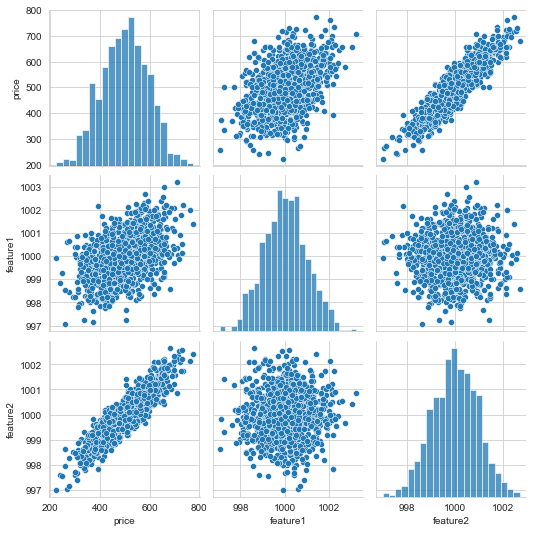

In [9]:
sns.pairplot(df);

In [10]:
df.corr()

,price,feature1,feature2
price,1.000,0.444,0.908
feature1,0.444,1.000,0.031
feature2,0.908,0.031,1.000


## Preprocessing of Data
- Train | Test Split, Scalling

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df[['feature1', 'feature2']].values
y = df['price'].values

In [13]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [14]:
y

array([461.52792939, 548.13001146, 410.29716167, 540.38221981,
       546.02455292, 542.9836716 , 555.48566416, 417.56972453,
       373.14653122, 633.35029248, 624.24709206, 475.37241721,
       600.36844486, 532.83295175, 472.8353628 , 506.31229096,
       508.414406  , 610.4553519 , 323.65776198, 446.21230389,
       362.12270299, 433.41064026, 562.00257647, 637.30962074,
       522.80800754, 469.8028243 , 543.10992778, 565.43416994,
       530.03285381, 610.58016503, 482.55641188, 327.56004052,
       579.73083872, 448.42981468, 628.97709187, 536.79737216,
       570.06729543, 357.82557519, 612.08492732, 444.67970846,
       600.1186364 , 523.53312776, 512.94994495, 614.8813169 ,
       404.35303251, 643.68851807, 488.95660398, 443.20468572,
       514.47906638, 514.88174058, 325.05852217, 554.6620585 ,
       451.39140001, 587.67887726, 477.73749721, 574.51560687,
       548.9107991 , 528.69088356, 443.21100482, 397.88209319,
       355.79535223, 460.69478138, 534.7673737 , 537.60

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [16]:
X_train.shape

(700, 2)

In [17]:
X_test.shape

(300, 2)

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bool, default=True
 |      Set to Fal

In [20]:
scaler = MinMaxScaler()

In [21]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
X_train.max()

1.0

In [23]:
X_train.min()

0.0

In [24]:
X_test.max()

1.0186515935232023

In [25]:
X_test.min()

-0.014108392024525074

## Modelling

In [26]:
import tensorflow as tf

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [28]:
help(Sequential)

Help on class Sequential in module keras.engine.sequential:

class Sequential(keras.engine.functional.Functional)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(tf.keras.layers.Dense(4))
 |  
 |  # This is identical to the following:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(shape=(16,)))
 |  model.add(tf.keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the `input_shape` argument.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = tf.keras.Sequentia

In [29]:
help(Dense)
# dense is used for getting fully connected layers

Help on class Dense in module keras.layers.core.dense:

class Dense(keras.engine.base_layer.Layer)
 |  Dense(*args, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`). These are all attributes of
 |  `Dense`.
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of the `kernel` (using `tf.tensordot`).
 |  For example, if input has dimensions `(batch_size, d0, d1)`,
 |  then we create a `kernel` with shape `(d1, units)`, and the `kernel` operates
 |  along axis 2 of the `input`, on every

In [30]:
# First way to create model

model = Sequential([Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 1)])

In [31]:
# Second way to create model (recommended)

model = Sequential()
model.add(Dense(units = 4, activation = "relu"))     # input_dim = X_train.shape[1]
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1))  # output layer

In [34]:
model.compile(optimizer = "rmsprop", loss = "mse")

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [35]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 250)
# 22 ===> 700/32  (700 satır vardı train datasında)
# her çalıştırıldığında farklı sonuçlar alınır

Epoch 1/250
22/22 [==============================] - 1s 2ms/step - loss: 256686.7656
Epoch 2/250
22/22 [==============================] - 0s 2ms/step - loss: 256604.6562
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 256502.1094
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 256378.5156
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 256234.9688
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 256074.9219
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 255893.2500
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 255685.0000
Epoch 9/250
22/22 [==============================] - 0s 2ms/step - loss: 255450.0156
Epoch 10/250
22/22 [==============================] - 0s 2ms/step - loss: 255183.7969
Epoch 11/250
22/22 [==============================] - 0s 2ms/step - loss: 254882.7188
Epoch 12/250
22/22 [==============================] - 0s 2ms/st

22/22 [==============================] - 0s 2ms/step - loss: 1743.2086
Epoch 97/250
22/22 [==============================] - 0s 2ms/step - loss: 1715.3600
Epoch 98/250
22/22 [==============================] - 0s 2ms/step - loss: 1685.8645
Epoch 99/250
22/22 [==============================] - 0s 2ms/step - loss: 1655.8845
Epoch 100/250
22/22 [==============================] - 0s 2ms/step - loss: 1628.9543
Epoch 101/250
22/22 [==============================] - 0s 2ms/step - loss: 1601.7642
Epoch 102/250
22/22 [==============================] - 0s 2ms/step - loss: 1574.8080
Epoch 103/250
22/22 [==============================] - 0s 2ms/step - loss: 1547.4614
Epoch 104/250
22/22 [==============================] - 0s 2ms/step - loss: 1518.7461
Epoch 105/250
22/22 [==============================] - 0s 2ms/step - loss: 1491.6118
Epoch 106/250
22/22 [==============================] - 0s 2ms/step - loss: 1464.5906
Epoch 107/250
22/22 [==============================] - 0s 2ms/step - loss: 1438.66

22/22 [==============================] - 0s 1ms/step - loss: 37.8565
Epoch 194/250
22/22 [==============================] - 0s 2ms/step - loss: 36.5035
Epoch 195/250
22/22 [==============================] - 0s 2ms/step - loss: 34.8857
Epoch 196/250
22/22 [==============================] - 0s 2ms/step - loss: 33.0094
Epoch 197/250
22/22 [==============================] - 0s 2ms/step - loss: 31.6292
Epoch 198/250
22/22 [==============================] - 0s 2ms/step - loss: 30.5375
Epoch 199/250
22/22 [==============================] - 0s 2ms/step - loss: 29.2795
Epoch 200/250
22/22 [==============================] - 0s 2ms/step - loss: 28.6938
Epoch 201/250
22/22 [==============================] - 0s 2ms/step - loss: 27.7429
Epoch 202/250
22/22 [==============================] - 0s 2ms/step - loss: 27.2754
Epoch 203/250
22/22 [==============================] - 0s 2ms/step - loss: 26.9201
Epoch 204/250
22/22 [==============================] - 0s 2ms/step - loss: 26.7541
Epoch 205/250
22/2

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 12        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.weights

[<tf.Variable 'dense_4/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[-0.2755667, -0.9963236,  1.38462  ,  2.2188575],
        [ 0.2172028, -0.0406332,  4.2057786,  3.1802988]], dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(4,) dtype=float32, numpy=array([-0.14816648,  0.        ,  0.6506621 ,  0.77830935], dtype=float32)>,
 <tf.Variable 'dense_5/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-5.7228714e-01, -7.1561164e-01,  3.6008250e-02, -1.5741137e-01],
        [-1.4527440e-03, -2.4907160e-01, -1.1124480e-01,  1.9689995e-01],
        [ 2.1951864e+00,  1.9618574e+00,  2.8118992e+00,  2.6226649e+00],
        [ 2.7907500e+00,  2.3585107e+00,  2.5339324e+00,  2.2730935e+00]],
       dtype=float32)>,
 <tf.Variable 'dense_5/bias:0' shape=(4,) dtype=float32, numpy=array([0.7480251 , 0.75358933, 0.74686086, 0.7523494 ], dtype=float32)>,
 <tf.Variable 'dense_6/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.58590186, -0.07536185,  2.4549353 , -0.29872417],
   

In [38]:
model.history.history

{'loss': [256686.765625,
  256604.65625,
  256502.109375,
  256378.515625,
  256234.96875,
  256074.921875,
  255893.25,
  255685.0,
  255450.015625,
  255183.796875,
  254882.71875,
  254545.625,
  254170.28125,
  253754.671875,
  253293.734375,
  252784.546875,
  252224.34375,
  251612.4375,
  250943.25,
  250211.984375,
  249420.015625,
  248565.09375,
  247639.421875,
  246638.75,
  245565.375,
  244406.3125,
  243166.0625,
  241845.234375,
  240433.125,
  238925.4375,
  237318.1875,
  235620.140625,
  233810.109375,
  231902.328125,
  229877.640625,
  227746.453125,
  225501.875,
  223143.359375,
  220660.140625,
  218039.90625,
  215296.203125,
  212438.0625,
  209440.796875,
  206320.359375,
  203066.359375,
  199670.5625,
  196142.921875,
  192475.765625,
  188694.59375,
  184753.5,
  180688.75,
  176488.484375,
  172156.359375,
  167685.609375,
  163078.75,
  158358.921875,
  153511.078125,
  148555.484375,
  143468.765625,
  138282.375,
  133032.40625,
  127633.796875,
  1221

In [39]:
pd.DataFrame(model.history.history)

,loss
0,256686.766
1,256604.656
2,256502.109
3,256378.516
4,256234.969
...,...
245,24.404
246,23.699
247,24.279
248,24.150


<AxesSubplot:>

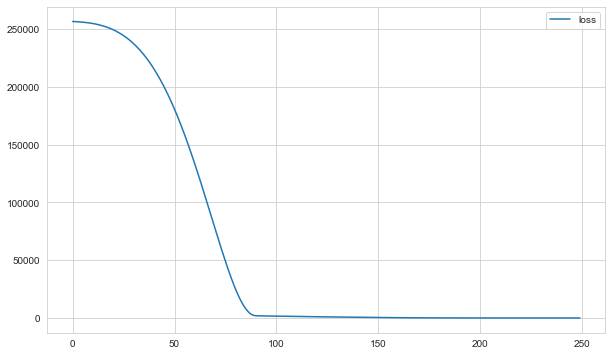

In [40]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

(0.0, 3000.0)

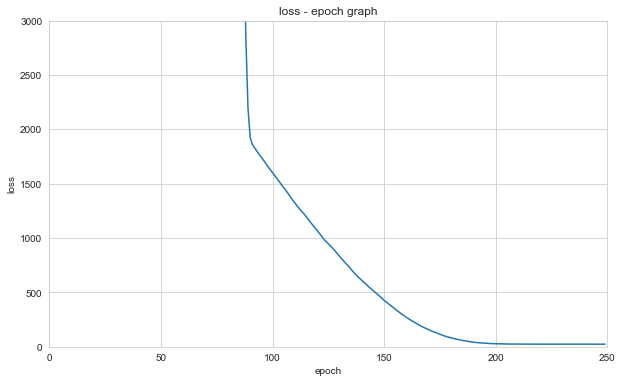

In [41]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 250]) # focusing on the given x values
ax.set_ylim([0, 3000]) # focusing on the given y values

# 200'de istediğimiz değere gelmiş; 250 epoch olmayabilirdi

## Model Performance

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

In [43]:
model.evaluate(X_train, y_train, verbose=0)  # mse score (modeli compile yaparken metric olarak 'mse' belirtmiştik)

23.76848030090332

In [44]:
model.evaluate(X_test, y_test, verbose=0)  # mse score

25.01264762878418

In [45]:
y_pred = model.predict(X_test)

In [46]:
explained_variance_score(y_test, y_pred)

0.9971600344463666

In [47]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
190,433.423,437.818
53,405.400,408.656
200,610.580,606.791
197,338.134,337.234
119,656.973,659.684
40,621.119,618.776
145,603.559,603.555
15,429.215,437.364
198,497.465,492.821
101,524.324,525.600


<AxesSubplot:xlabel='Actual', ylabel='Pred'>

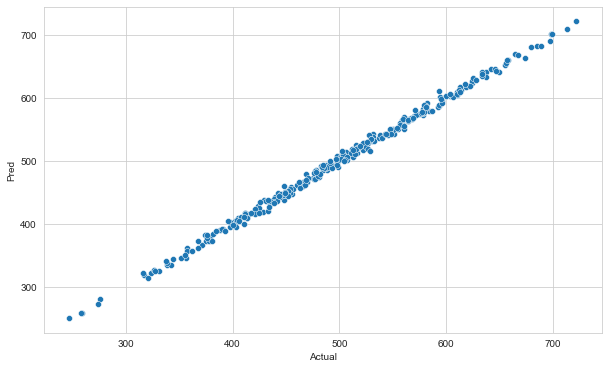

In [48]:
sns.scatterplot(x = 'Actual', y = 'Pred', data = compare)

In [49]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [50]:
eval_metric(y_test, y_pred)

r2_score: 0.99715507700955 
mae: 4.006326973912552 
mse: 25.012653017697602 
rmse: 5.001265141711405


## Final Model and Model Deployment

In [51]:
scaler = MinMaxScaler().fit(X)

In [52]:
import pickle
pickle.dump(scaler, open("scaler_fake_reg", 'wb'))

In [53]:
X_scaled = scaler.transform(X)

In [54]:
final_model = Sequential()

final_model.add(Dense(units = 4, activation = "relu"))     # input_dim = 2 or input_dim = X_train.shape[0]
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(1))

final_model.compile(optimizer = "rmsprop", loss = "mse")

final_model.fit(x = X_scaled, y = y, batch_size = 32, epochs = 250)

# sonuçlar kötü çıksaydı (model eğitilmemiş olsaydı) tekrar çalıştıracaktık

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 257339.4062
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 257154.8281
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 256968.7344
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 256764.5781
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 256535.4375
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 256271.0781
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 255967.3750
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 255614.5469
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 255212.1562
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 254754.9375
Epoch 11/250
32/32 [==============================] - 0s 2ms/step - loss: 254236.3750
Epoch 12/250
32/32 [==============================] - 0s 2ms/st

32/32 [==============================] - 0s 2ms/step - loss: 973.7225
Epoch 98/250
32/32 [==============================] - 0s 2ms/step - loss: 946.6874
Epoch 99/250
32/32 [==============================] - 0s 2ms/step - loss: 919.6530
Epoch 100/250
32/32 [==============================] - 0s 2ms/step - loss: 895.3033
Epoch 101/250
32/32 [==============================] - 0s 1ms/step - loss: 871.7576
Epoch 102/250
32/32 [==============================] - 0s 2ms/step - loss: 848.2585
Epoch 103/250
32/32 [==============================] - 0s 1ms/step - loss: 821.1494
Epoch 104/250
32/32 [==============================] - 0s 2ms/step - loss: 796.8530
Epoch 105/250
32/32 [==============================] - 0s 2ms/step - loss: 771.3870
Epoch 106/250
32/32 [==============================] - 0s 1ms/step - loss: 745.1951
Epoch 107/250
32/32 [==============================] - 0s 1ms/step - loss: 723.1934
Epoch 108/250
32/32 [==============================] - 0s 1ms/step - loss: 698.4179
Epoch 10

32/32 [==============================] - 0s 1ms/step - loss: 24.5656
Epoch 196/250
32/32 [==============================] - 0s 1ms/step - loss: 24.7488
Epoch 197/250
32/32 [==============================] - 0s 2ms/step - loss: 24.7179
Epoch 198/250
32/32 [==============================] - 0s 1ms/step - loss: 24.6810
Epoch 199/250
32/32 [==============================] - 0s 1ms/step - loss: 24.5081
Epoch 200/250
32/32 [==============================] - 0s 1ms/step - loss: 24.6572
Epoch 201/250
32/32 [==============================] - 0s 1ms/step - loss: 24.6322
Epoch 202/250
32/32 [==============================] - 0s 2ms/step - loss: 24.5685
Epoch 203/250
32/32 [==============================] - 0s 1ms/step - loss: 24.6885
Epoch 204/250
32/32 [==============================] - 0s 1ms/step - loss: 24.6702
Epoch 205/250
32/32 [==============================] - 0s 2ms/step - loss: 24.6815
Epoch 206/250
32/32 [==============================] - 0s 1ms/step - loss: 24.6743
Epoch 207/250
32/3

H5 is a file format to store structured data, it's not a model by itself. Keras saves models in this format as it can easily store the weights and model configuration in a single file.

In [55]:
final_model.save('model_fake_reg.h5')  # creates a HDF5 file 'my_model.h5'

## Prediction-1

In [56]:
from tensorflow.keras.models import load_model

In [57]:
model_fake_reg = load_model('model_fake_reg.h5')

In [58]:
scaler_fake_reg = pickle.load(open("scaler_fake_reg", "rb"))

In [59]:
sample = [[998, 1000]]

In [60]:
sample_scaled = scaler_fake_reg.transform(sample)

In [61]:
model_fake_reg.predict(sample_scaled)

array([[418.99695]], dtype=float32)

## Prediction-2

In [62]:
my_dict = {"Feature1": [997, 998, 999, 1000, 1001],
           "Feature2": [1000, 999, 998, 997, 996]}

In [63]:
sample = pd.DataFrame(my_dict)
sample

,Feature1,Feature2
0,997,1000
1,998,999
2,999,998
3,1000,997
4,1001,996


In [64]:
sample_scaled = scaler_fake_reg.transform(sample)
sample_scaled

array([[-0.00948799,  0.52980619],
       [ 0.15312457,  0.35345977],
       [ 0.31573713,  0.17711336],
       [ 0.47834969,  0.00076694],
       [ 0.64096225, -0.17557948]])

In [65]:
model_fake_reg.predict(sample_scaled)

array([[378.9291 ],
       [330.63547],
       [282.34183],
       [234.04819],
       [185.75453]], dtype=float32)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___